<a href="https://colab.research.google.com/github/sravan1320/ML-Algo/blob/master/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# !pip install lightgbm 

In [0]:
pd.set_option('display.max_rows', 5000000)

In [0]:
companyData=pd.read_csv("train.csv")
companytestData=pd.read_csv("test.csv")

In [57]:
companyData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
companytestData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
companyData.isnull().sum() 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
companytestData.isnull().sum() 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [0]:
copyData=companyData.copy()

In [12]:
#CHeck is there any patterns to fill category values '0' with other value
np.sort(copyData['Purchase'].unique())
# for i in np.sort(copyData['Purchase'].unique()):
#   print(copyData[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']][copyData['Purchase']==12])
#   break;

# dont see any patterns to fill NANs 

array([   12,    13,    14, ..., 23959, 23960, 23961])

In [0]:
# so Impute Nan to 0 
copyData['Product_Category_2'].fillna(copyData['Product_Category_2'], axis=0, inplace=True)
copyData['Product_Category_3'].fillna(copyData['Product_Category_3'], axis=0, inplace=True)

companytestData['Product_Category_2'].fillna(companytestData['Product_Category_2'], axis=0, inplace=True)
companytestData['Product_Category_3'].fillna(companytestData['Product_Category_3'], axis=0, inplace=True)

#drop Purchase Nan row
copyData.dropna(axis=0, inplace=True)
companytestData.dropna(axis=0, inplace=True)

In [14]:
copyData.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [0]:
#Drop unnecessary columns
copyData.drop(['User_ID','Product_ID'], axis=1, inplace=True)

In [16]:
copyData.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

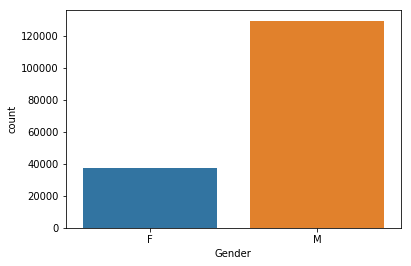

In [16]:
#Check Gender count
sns.countplot('Gender', data=copyData)
plt.show()

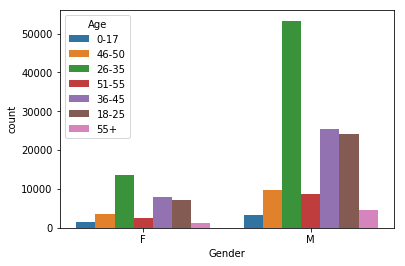

In [17]:
# Gender wise Age
sns.countplot('Gender', data=copyData, hue='Age')
plt.show()

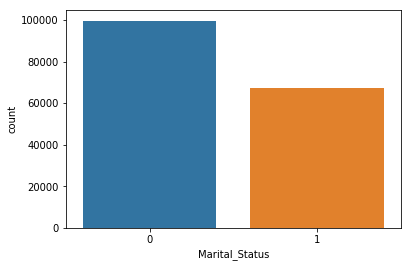

In [18]:
# Maritual Status Count
sns.countplot('Marital_Status', data=copyData)
plt.show()

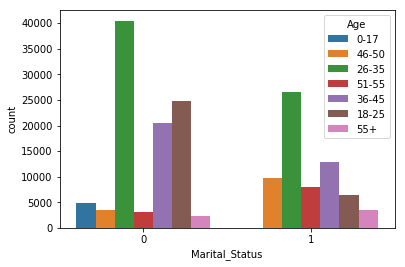

In [19]:
# Martitual Status by Age
sns.countplot('Marital_Status', data=copyData, hue='Age')
plt.show()

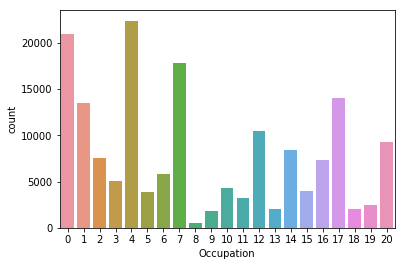

In [20]:
# Martitual Status by Age
sns.countplot('Occupation', data=copyData)
plt.show()

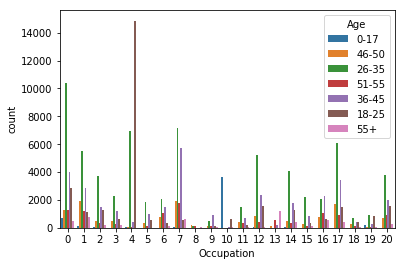

In [21]:
# Martitual Status by Age
sns.countplot('Occupation', data=copyData, hue='Age')
plt.show()

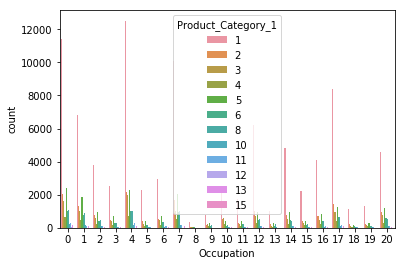

In [22]:
# Martitual Status by Age
sns.countplot('Occupation', data=copyData, hue='Product_Category_1')
plt.show()

In [87]:
#UNique Values
dict={}
def GetUniqueValues(df):
  for i in df:
    # print(df[i].unique())
    dict[i]=(df[i].unique())
  return dict

GetUniqueValues(copyData)
# GetUniqueValues(companytestData)

{'Age_18-25': array([0, 1], dtype=uint64),
 'Age_26-35': array([0, 1], dtype=uint64),
 'Age_36-45': array([0, 1], dtype=uint64),
 'Age_46-50': array([0, 1], dtype=uint64),
 'Age_51-55': array([0, 1], dtype=uint64),
 'Age_55+': array([0, 1], dtype=uint64),
 'City_Category_B': array([0, 1], dtype=uint64),
 'City_Category_C': array([0, 1], dtype=uint64),
 'Gender_M': array([0, 1], dtype=uint64),
 'Marital_Status': array([0, 1]),
 'Occupation': array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
        13,  6,  5, 18]),
 'Product_Category_1': array([ 1,  5,  2,  6,  3,  4,  8, 12, 11, 10, 15, 13]),
 'Product_Category_2': array([ 6.,  8.,  2.,  3., 14.,  5.,  4., 11., 15., 10.,  9., 13., 12.,
        16.]),
 'Product_Category_3': array([14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
        11., 10.]),
 'Purchase': array([15200, 19215, 15665, ...,  9407,  2323, 18755]),
 'Stay_In_Current_City_Years': array([2., 1., 4., 0., 3.])}

In [0]:
# Remove + from Stay_In_Current_City_Years
copyData['Stay_In_Current_City_Years']=(copyData['Stay_In_Current_City_Years'].str.strip('+').astype('float'))
companytestData['Stay_In_Current_City_Years']=(companytestData['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [20]:
#Handle Categories
cat_column=[]
for i in copyData.columns:
  if (copyData[i].dtypes=='object'):
    cat_column.append(i)

print(cat_column)

['Gender', 'Age', 'City_Category']


In [0]:
companytestData1=companytestData.copy()

In [0]:
copyData=pd.get_dummies(copyData,  drop_first=True )
companytestData1=pd.get_dummies(companytestData1, columns=cat_column, drop_first=True )


In [82]:
companytestData1.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
4,1000011,P00053842,1,1.0,0,4,5.0,12.0,0,0,1,0,0,0,0,0,1
5,1000013,P00350442,1,3.0,1,2,3.0,15.0,1,0,0,0,1,0,0,0,1
6,1000013,P00155442,1,3.0,1,1,11.0,15.0,1,0,0,0,1,0,0,0,1
7,1000013,P0094542,1,3.0,1,2,4.0,9.0,1,0,0,0,1,0,0,0,1
8,1000015,P00161842,7,1.0,0,10,13.0,16.0,1,0,1,0,0,0,0,0,0


In [22]:
copyData.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
1,10,2.0,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0
6,7,2.0,1,1,8.0,17.0,19215,1,0,0,0,1,0,0,1,0
13,20,1.0,1,1,2.0,5.0,15665,1,0,1,0,0,0,0,0,0
14,9,1.0,0,5,8.0,14.0,5378,0,0,0,0,0,1,0,0,0
16,9,1.0,0,2,3.0,4.0,13055,0,0,0,0,0,1,0,0,0


In [0]:
# sns.pairplot(copyData, hue='Purchase')
# plt.show()

In [23]:
X=copyData.drop(['Purchase'], axis=1)
Y=(copyData['Purchase']).ravel()
print('X Shape', X.shape)
print('Y Shape', Y.shape)

X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,Y, test_size=0.3, random_state=56)


print('X_Train Shape', X_Train.shape)
print('X_Test Shape', X_Test.shape)
print('Y_Train Shape', Y_Train.shape)
print('Y_Test Shape', Y_Test.shape)


X Shape (166821, 15)
Y Shape (166821,)
X_Train Shape (116774, 15)
X_Test Shape (50047, 15)
Y_Train Shape (116774,)
Y_Test Shape (50047,)


In [100]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledRandome', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21383182.041097 (221615.436406)
ScaledLASSO: -21383332.798943 (220830.533957)
ScaledRidge: -21383181.903929 (221613.294047)
ScaledEN: -21947851.917678 (203883.932623)
ScaledDT: -18675548.217560 (231007.120122)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

ScaledRandome: -14801563.669446 (158737.577515)
ScaledGBM: -12818854.055464 (155802.651479)


In [0]:
# gbm=GradientBoostingRegressor()

# #Above you can Gradient Regressor is best, lets do parameter tuning to it
# params = {'n_estimators': [400], 'max_depth': range(2,8,2)}
# # , 'min_samples_split': range(2,10,2),
# #           'learning_rate': [0.1,0.2,0.3,0.4,0.5], 'loss': ['ls', 'lad', 'huber', 'quantile']}

# # run randomized search
# n_iter_search = 20
# random_search = RandomizedSearchCV(gbm, param_distributions=params,
#                                    n_iter=n_iter_search)
# random_search.fit(X_Train, Y_Train)

# print(random_search.cv_results_)

# print(random_search.score) 

In [0]:
# random_search.best_estimator_

In [34]:
pipelines = []
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=700,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledGBM: -12363471.602429 (126966.017531)


In [37]:
gbm=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=700,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gbm.fit(X_Train, Y_Train)
  

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=700,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Pred_Y=gbm.predict(companytestData1.drop(['User_ID','Product_ID'], axis=1))

In [0]:
companytestData1['Purchase']=Pred_Y

In [0]:
companytestData1['Comb'] =companytestData1['User_ID'].astype(str) + companytestData1['Product_ID'].astype(str)

In [0]:
companytestData1[['Comb','Purchase']].to_csv(r'Sample_Submission.csv',index=False)